# Analyzing the Time of Playing and Players' Age : A Case Study of factors affecting subscription

 ## 1. Introduction

### 1.1. Background
In recent years, the subscription model has become increasingly popular across various industries used by digital media, especially in the production of information related to finance, politics, and entertainment. Companies offering such services often seek to understand the factors influencing users' subscription decisions and engagement levels. This study aims to test which variables can predict player subscription status in the provided dataset in the gaming field. I hope that game companies can gain valuable insights to optimize user retention strategies, personalize service content, and design targeted marketing campaigns.

### 1.2. Question
#### Can the time of playing games and players' age predict the subscription condition in players' dataset?

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

- After importing the package to be used, I need to use `read_csv()` to read the dataset. The dataframe name is setted to `data_players`. Using a relevant path `data/players.csv`to insert the data.
- `head()` is designed to read first several rows of dataset.

In [2]:
data_players<-read_csv("data/players.csv")
head(data_players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### 1.3. Data Description
- Number of oberservation: 196
#### From the read dataset, we can see that there are 7 main variables.
- Experience: Describing a player's proficiency in a game is divided into five levels, which are pro, veteran, amateur, regular and beginner. Also, it is a character variable.
- Age: The player's age. This variable is one that I used to predict the subscription condition. It is a double class A double-precision floating point number.
- Time of playing: Time spent playing the game. This variable is another one that I used to predict the subscription condition. It is a double class A double-precision floating point number.
- Subscribe: This variable indicates whether the player has subscribed. It is a logical variable.
- Name: The name of the player. It is a character variable too. I consider that this variable is not suitable for prediction.
- Gender: This variable specifies the player's gender. It is a character variable. I consider that this variable is not suitable for prediction.
- HashedEmail: Like the player's id or the account. Same with the gender and name, hashedemial is not suitable for prediction.

### I choose the Question 1
#### The age, played_hours are used to predict the subscribing using knn classification.
##### Assuming both player's age and played time are predictive of subscribing the game_related newsletter. We assume that the longer players spend playing games, the more willing they are to subscribe to game-related newsletters. Players who are too old are not very willing to subscribe to newsletters.

## 2. Method and Result

For wrangling and cleaning the data, I firstly use the `mutate()` function to create new dataframe by adding a new column for `subscribe` so that the `subscribe` can be used as a factor in my knn classification.

`select()` function is used to select the column I need for this project. K-nearest classification need the numerical data, only the `played_hours` and `Age` are satisfied the requirments from the dataset. In addition, observations that lack of data `NA` are removed by `drop_na()` function.

The `head()` function is also used to list several rows of the `players_new_frame`.

In [3]:
players_new_frame <- mutate(data_players,subscribe =as.factor(subscribe))|> select(played_hours, Age, subscribe)|> drop_na()
players_new_frame  |> summarize(max_hr = max(played_hours), mean_hr = mean(played_hours, na.rm=TRUE))
head(players_new_frame)

max_hr,mean_hr
<dbl>,<dbl>
223.1,5.904639


played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
0.0,17,TRUE


Now, the `subscribe` is added as a separate variable to the dataset we needed for prediction.

- To verify the hypothesis proposed earlier, I create scatter plots showing the relationship between play time, age, and subscription. Furthermore, I use the `scale_x_log10()`  to make the figures more readable.

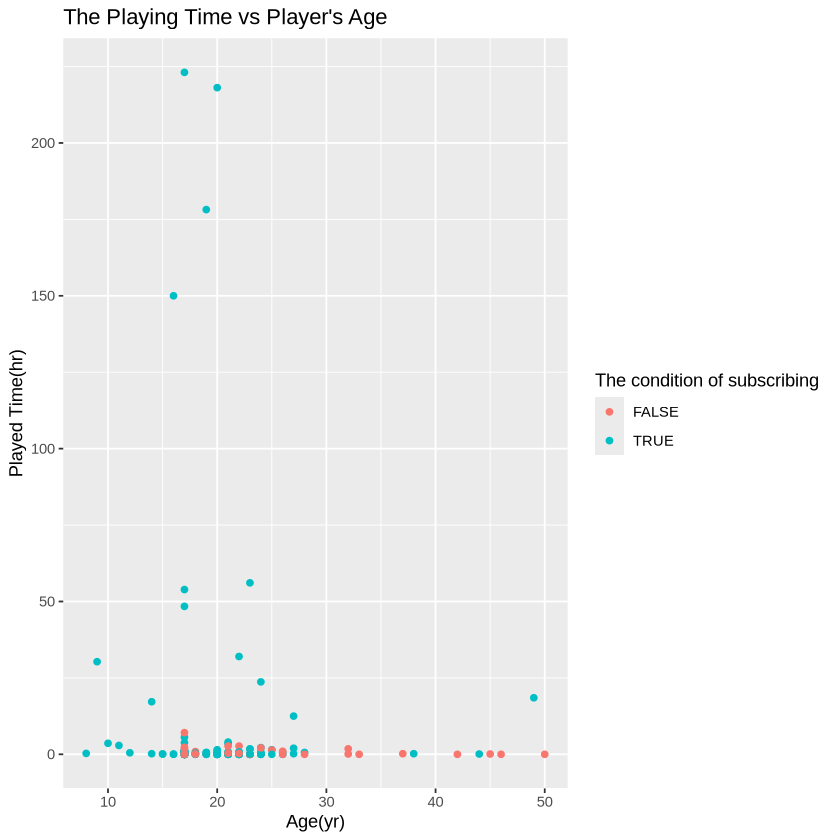

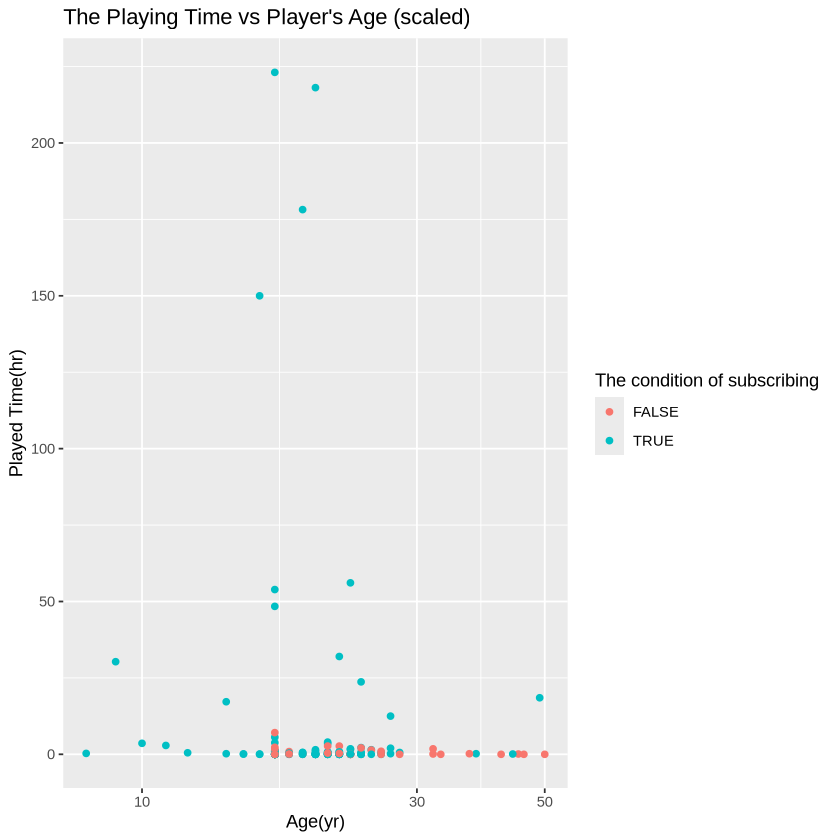

In [4]:
players_plot<- ggplot(players_new_frame, aes(x=Age, y=played_hours)) +
               geom_point(aes(color=subscribe))+
               labs(x="Age(yr)",y="Played Time(hr)",color="The condition of subscribing", title="The Playing Time vs Player's Age")

players_plot

players_scaled<-ggplot(players_new_frame, aes(x=Age, y=played_hours)) +
               geom_point(aes(color=subscribe))+
               labs(x="Age(yr)",y="Played Time(hr)",color="The condition of subscribing", title="The Playing Time vs Player's Age (scaled)")+
               scale_x_log10()
players_scaled

- As can be seen from the figure, most of the blue dots and red dots are concentrated in the lower half of the figure. As the gaming time increases, blue dots (subscribed players) appear much more frequently than red dots (non-subscribed players). In horizontal direction, red dots appear much more frequently than blue dots as the player's age increasing,w which means older players are less interested in subscribing.

### Based on Khan's research (2020), k-nearest neighbors classification is very essential model to  predict the player's behavior of subscribing , so it's helpful to verify my previous hypothesis and the accuracy of the prediction.

To train a model using k-nearnest neighbor to predict the label of `subscribe` , we must fist use `initial_split()` to separate the training data and testing data.  The function of `prop` specifies the proportion of the original data set to train, here I take 70% of the original data as the training set. The `strata` used here is order to do the stratified sampling,which Ensure that the proportion of the variable `subscribe` remains similar in the training set and testing set.

In [5]:
set.seed(1234)

players_split<-initial_split(players_new_frame, prop = 0.7, strata= subscribe)
players_training<- training(players_split)
players_testing<-testing(players_split)

The function `recipe()` helps create a recipe. To ensure that both variables contribute equally to the model and prevent any one feature from dominating due to differences in scale, the data are standardized. After applying scaling and centering (using `step_scale()`and `step_center()`), all predictors have been transformed to have a mean of 0 and a standard deviation of 1.

In [6]:
players_recipe<-recipe(subscribe~played_hours + Age, data = players_training)|>
step_scale(all_predictors())|> 
step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Here, I'm doing a knn model specification by `nearest_neighbor()` function. `tune()` indicates that the value of k will be optimized. I choose the `knn` model in setting the engine. In `set_mode`, the classification task is specified. 

In [7]:
knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors= tune())|>
          set_engine("kknn")|>
          set_mode("classification")

To determine the accuracy of the model, I use a method called cross-validation. Here I use 5 folds for cross-validation.

In [8]:
players_vfold<-vfold_cv(players_training, v=5, strata= subscribe)

I use `seq()` to create a data frame that has values from 1 to 30, stored by `k_val`

Now, I can use the `workflow()` to combine the `players_recipe` with `knn_spec`. Then, the`tune_grid()`is used to apply 5-fold cross-validation across all values in `k_val`. 

In [9]:
set.seed(1234)
k_val<-tibble(neighbors= seq(from =1, to= 30, by =1))
knn_rsults<-workflow()|>
         add_recipe(players_recipe)|>
         add_model(knn_spec)|>
         tune_grid(resamples =players_vfold, grid=k_val)|>
         collect_metrics()
accuracies<-filter(knn_rsults, .metric =="accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4960317,5,0.041920993,Preprocessor1_Model01
2,accuracy,binary,0.4589947,5,0.025594469,Preprocessor1_Model02
3,accuracy,binary,0.5116809,5,0.033708050,Preprocessor1_Model03
4,accuracy,binary,0.4894587,5,0.044335190,Preprocessor1_Model04
5,accuracy,binary,0.5995116,5,0.016242198,Preprocessor1_Model05
6,accuracy,binary,0.6066545,5,0.021671061,Preprocessor1_Model06
7,accuracy,binary,0.6299756,5,0.021589290,Preprocessor1_Model07
8,accuracy,binary,0.5995319,5,0.046549091,Preprocessor1_Model08
9,accuracy,binary,0.7200041,5,0.032827276,Preprocessor1_Model09


After I get the result, the visualization of the result is presented here.

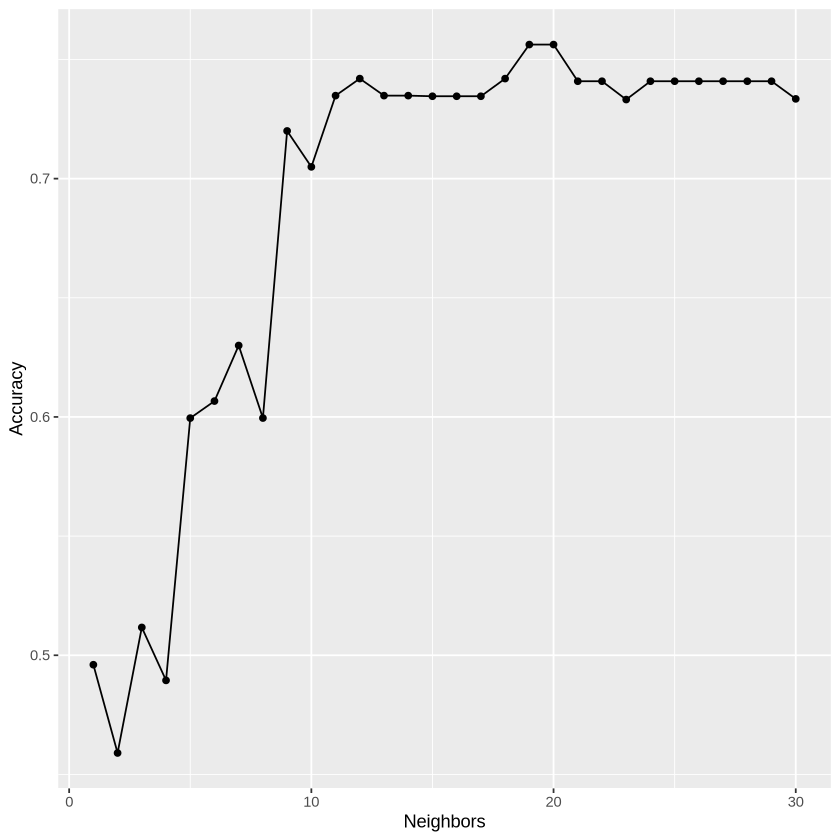

In [10]:
accuracy_plot<-ggplot(accuracies, aes( x=neighbors, y= mean))+
               geom_point()+
               geom_line()+
               labs(x= "Neighbors", y= "Accuracy")
accuracy_plot

Here, I use the `best-k` function to demonstrate the fitting effect of my knn model.

In [11]:
best_k <- accuracies |>
          arrange(desc(mean))|>
          head(1)|>
          pull(neighbors)
best_k

[1] 19

After getting the value of `best-k` , we can now evaluate the testing set by using same way for dealing with the training data.

The function `predict()` generates predictions for the testing dataset and `bind_cols()` combines predictions with original testing data for easier comparison.

In [12]:
knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors= best_k)|>
          set_engine("kknn")|>
          set_mode("classification")
knn_fit<- workflow()|>
         add_recipe(players_recipe)|>
         add_model(knn_spec)|>
         fit(data= players_testing)
my_prediction<-predict(knn_fit,players_testing)|>
          bind_cols(players_testing)
my_prediction

.pred_class,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,TRUE
TRUE,0.0,17,FALSE
TRUE,0.1,21,TRUE
TRUE,0.0,17,TRUE
TRUE,0.1,17,TRUE
TRUE,0.2,22,TRUE
TRUE,0.0,17,TRUE
TRUE,0.3,8,TRUE
TRUE,0.0,33,FALSE


In [13]:
accuracy<-my_prediction|>
          accuracy(truth= subscribe, estimate= .pred_class, event_level= "first")
accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7288136


## 3. Discussion

In this project, I explored the relationship between players’ age, playing time, and subscription status using K-nearest neighbors classification. After preprocessing and scaling the data, I performed hyperparameter tuning with 5-fold cross-validation to select the optimal number of neighbors, which was found to be 19. Using this optimized model, I predicted the subscription status on the testing data and compared it to the actual labels.

The results generally aligned with my expectations. I anticipated that both age and total played hours would influence a player’s likelihood to subscribe, as younger players and those with more playing time might be more engaged and thus more likely to subscribe. The model confirmed this relationship to some extent, though the overall accuracy, which is about 72.89%, suggests that these two predictors may not fully capture the complexity of the subscription decision.

These findings may have implications for game developers and marketing teams. Understanding the relationship between age, user engagement time, and subscription behavior allows developers and marketers to tailor their marketing strategies to different age groups and players with varying amounts of gaming time, thereby maximizing profits.

Future research could expand this model by including additional predictors such as in-game purchases, social activity, player demographics, or game progression levels. This may lead to more accurate predictions and a deeper understanding of player behavior. Furthermore, testing alternative classification algorithms, such as decision trees or ensemble models, could provide valuable comparisons to improve predictive performance.

## 4. Reference

Khan, S. (2020). Predicting Customer Churn in World of Warcraft. arXiv preprint arXiv:2006.15735.

## 5. Explanation of the commit error issue